Import Data Files


In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import os 
from sqlalchemy import create_engine, Column, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Creating Local Database


In [3]:

db_path = 'sqlite:///Universe.db'
engine = create_engine(db_path)

dc_url = "https://raw.githubusercontent.com/kejbrown/SuperheroUniverseAnaylsis/master/DC%20Data.csv"
marvel_url = "https://raw.githubusercontent.com/kejbrown/SuperheroUniverseAnaylsis/master/Marvel%20Data.csv"
download = requests.get(dc_url).content
download_1 = requests.get(marvel_url).content

df_dc = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_marvel = pd.read_csv(io.StringIO(download_1.decode('utf-8')))

df_dc.to_sql('dc_data_1', engine, if_exists='replace')
df_marvel.to_sql('marvel_data_1',engine, if_exists='replace')


16376

Join Tables 

In [4]:

# Create a SQLAlchemy engine
db_path = 'sqlite:///Universe.db'
engine = create_engine(db_path)

# Reads DC and Marvel tables from the database
df_dc = pd.read_sql('SELECT * FROM dc_data_1', engine)
df_marvel = pd.read_sql('SELECT * FROM marvel_data_1', engine)

# Rename the 'YEAR' column in df2 to 'Year'
df_dc.rename(columns={'YEAR': 'Year'}, inplace=True)

# Adds a "Universe" column 
df_dc['universe'] = 'DC'
df_marvel['universe'] = 'Marvel'
           
 
 # Combines DC and Marvel Data
df_combined = pd.concat([df_dc, df_marvel], ignore_index=True)

# Writes to a new table in database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

23272

In [5]:
df_combined

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,universe
0,0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,3093.0,"1939, May",1939.0,DC
1,1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,2496.0,"1986, October",1986.0,DC
2,2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,None,Living Characters,1565.0,"1959, October",1959.0,DC
3,3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,None,Living Characters,1316.0,"1987, February",1987.0,DC
4,4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,1237.0,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23268,16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23269,16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23270,16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,None,None,Male Characters,None,Living Characters,NaN,None,NaN,Marvel


Clean Data


In [6]:
 #Removing unwanted columns
unwanted_columns = ['page_id', 'urlslug', 'GSM', 'APPEARANCES'] 
df_combined = df_combined.drop(columns=unwanted_columns, errors='ignore')

# Writes changes to database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

23272

In [7]:
df_combined

,index,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,FIRST APPEARANCE,Year,universe
0,0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1939, May",1939.0,DC
1,1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1986, October",1986.0,DC
2,2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,"1959, October",1959.0,DC
3,3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,"1987, February",1987.0,DC
4,4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...
23267,16371,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Living Characters,None,NaN,Marvel
23268,16372,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Living Characters,None,NaN,Marvel
23269,16373,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Living Characters,None,NaN,Marvel
23270,16374,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,None,None,Male Characters,Living Characters,None,NaN,Marvel


Cleaning - Removes Null values in Gender Column

In [8]:
# Remove rows with NULL values in "SEX"
column_name_2 = 'SEX'  
df_combined = df_combined.dropna(subset=[column_name_2])

# Writes changes to database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

22293

Cleaning - Removes Null values in First Appearance Column

In [9]:
# Remove rows with NULL values in "First Appearance"
column_name_3 = 'FIRST APPEARANCE'  
df_combined = df_combined.dropna(subset=[column_name_3])

# Writes changes to database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

21469

Cleaning - Removes Null values in Align Column

In [10]:
# Remove rows with NULL values in "AlIGN"
column_name_4 = 'ALIGN' 
df_combined = df_combined.dropna(subset=[column_name_4])

# Writes changes to database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

18436

In [11]:
df_combined

,index,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,FIRST APPEARANCE,Year,universe
0,0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1939, May",1939.0,DC
1,1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1986, October",1986.0,DC
2,2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,"1959, October",1959.0,DC
3,3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,"1987, February",1987.0,DC
4,4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...
23066,16170,Virgo (Thanos' Zodiac) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Brown Hair,Female Characters,Deceased Characters,12-May,2012.0,Marvel
23067,16171,"\""Spider-Girl\"" (Mutant\/Spider Clone) (Earth-...",No Dual Identity,Neutral Characters,Brown Eyes,Blond Hair,Female Characters,Living Characters,13-Mar,2013.0,Marvel
23069,16173,Katy & Timothy Bashir (Earth-616),Secret Identity,Bad Characters,Brown Eyes,Black Hair,Female Characters,Deceased Characters,13-Feb,2013.0,Marvel
23070,16174,Mister Z'zz (Earth-616),None,Good Characters,White Eyes,None,Male Characters,Deceased Characters,13-Apr,2013.0,Marvel


In [12]:
# Remove rows with NULL values in "YEAR"
column_name_5 = 'Year' 
df_combined = df_combined.dropna(subset=[column_name_5])

# Writes changes to database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

18436

Display Data

What is the Gender Distrubition of Characters in DC vs Marvel? 

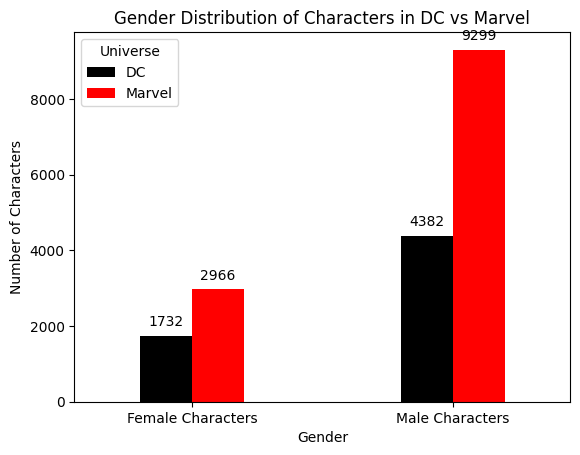

In [13]:
# Filter only Male and Female categories
df_filtered = df_combined[df_combined['SEX'].isin(['Male Characters', 'Female Characters'])]

gender_counts = df_filtered.groupby(['SEX', 'universe'])['name'].count().unstack(fill_value=0)

# Plotting a side-by-side bar chart showing the absolute difference
ax = gender_counts.plot(kind='bar', color=['black', 'red'], width=0.4)

# Add annotations for the absolute difference
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Number of Characters')
plt.title('Gender Distribution of Characters in DC vs Marvel')
plt.legend(title='Universe', loc='upper left')
plt.xticks(ticks=[0, 1], labels=['Female Characters', 'Male Characters'], rotation=0)
plt.show()

From the data, you can see 40% of DC characters are female, where as only 32% of Marvel characters are female. 

Increase of Female characters over the years 

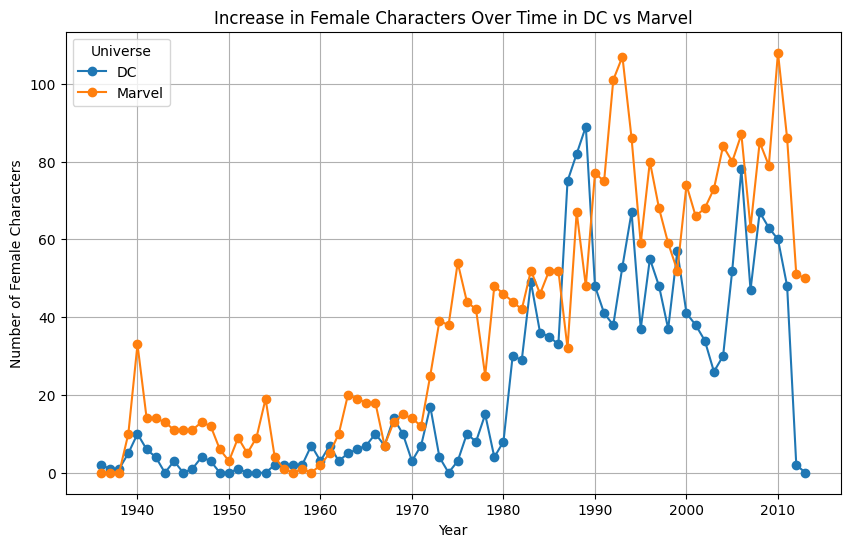

In [14]:
df_female = df_combined[df_combined['SEX'] == 'Female Characters']

# Group by 'Year' and 'universe' and count the number of female characters
female_counts = df_female.groupby(['Year', 'universe']).size().unstack(fill_value=0)

# Plotting a line graph to show the increase in female characters over time
plt.figure(figsize=(10, 6))
plt.plot(female_counts.index, female_counts['DC'], label='DC', marker='o')
plt.plot(female_counts.index, female_counts['Marvel'], label='Marvel', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Female Characters')
plt.title('Increase in Female Characters Over Time in DC vs Marvel')
plt.legend(title='Universe')
plt.grid(True)
plt.show()

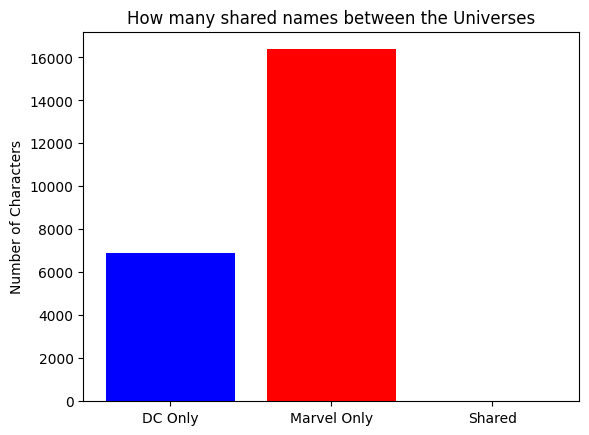

In [16]:

# Read DC and Marvel tables from the database
df_dc = pd.read_sql('SELECT * FROM dc_data_1', engine)
df_marvel = pd.read_sql('SELECT * FROM marvel_data_1', engine)


# Extract superhero names from both DataFrames
dc_names = set(df_dc['name'])
marvel_names = set(df_marvel['name'])

# Find common superhero names
shared_names = dc_names.intersection(marvel_names)

# Count the number of characters with shared names
shared_names_count = df_dc[df_dc['name'].isin(shared_names)].shape[0]

# Plotting a bar chart
labels = ['DC Only', 'Marvel Only', 'Shared']
sizes = [len(dc_names - shared_names), len(marvel_names - shared_names), shared_names_count]

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=['blue', 'red', 'purple'])
ax.set_ylabel('Number of Characters')
ax.set_title( 'How many shared names between the Universes')
plt.show()